# CLUSTERING: Hierarchical


In [14]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from kneed import KneeLocator
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/df.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,0,...,12,3,0,2,3,3,2,2,2,1
1,20,0,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,0,...,13,4,1,1,3,3,1,0,0,0
2,37,0,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,1,...,13,3,0,10,2,3,3,2,0,2
3,39,0,Travel_Rarely,1354,Research & Development,5,3,Medical,3,1,...,12,4,0,14,3,3,10,10,5,8
4,35,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,1,...,13,2,1,15,3,3,13,12,5,11


In [4]:
df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

In [5]:
features_selected = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [6]:
X = df[features_selected]
X.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,TotalSatisfaction
0,31,9,7978.000000,2,2,10
1,20,2,2323.000000,1,1,9
2,37,17,3375.000000,10,3,8
3,39,5,3069.000000,14,10,8
4,35,1,8264.307692,15,13,7


In [7]:
# normalize
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [10]:
methods = ["average", "complete", "ward", "single"]

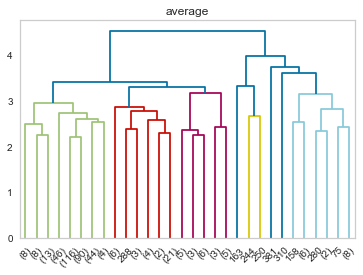

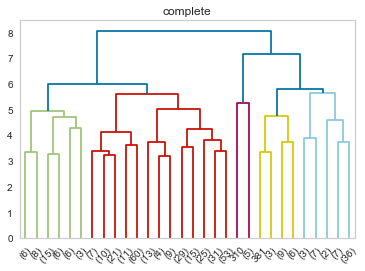

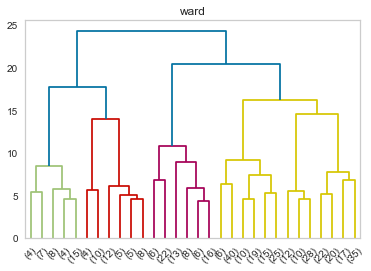

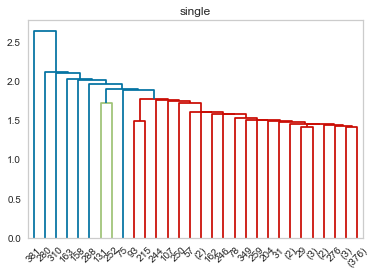

In [16]:
# Plot dendograms for each method 
for i in methods:
    data_dist = pdist(X, metric='euclidean')
    data_link = linkage(data_dist, method=i, metric='euclidean')
    res = dendrogram(data_link, truncate_mode='lastp')
    plt.title(str(i))
    plt.grid()
    plt.show()

# Wards' clustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(X)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(3,random_state=42)
pca.fit(X)
pca_proj = pca.transform(X)

In [21]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['ward_cluster'] = labels
pca_proj.head()

,pca1,pca2,pca3,ward_cluster
0,-0.676379,1.392263,-0.749697,1
1,-2.567063,0.342930,-0.684335,0
2,-0.525759,-0.929982,0.214567,2
3,0.347593,-1.125077,-0.166905,4
4,1.430663,0.464635,0.355078,0


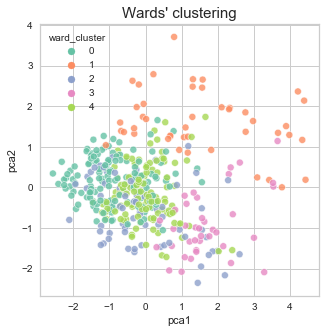

In [23]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='ward_cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("Wards' clustering", fontsize= 15)
plt.show()

### Single Link

In [34]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
labels = cluster.fit_predict(X)

In [35]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['single_cluster'] = labels
pca_proj.head()

,pca1,pca2,pca3,single_cluster
0,-0.676379,1.392263,-0.749697,0
1,-2.567063,0.342930,-0.684335,0
2,-0.525759,-0.929982,0.214567,0
3,0.347593,-1.125077,-0.166905,0
4,1.430663,0.464635,0.355078,0


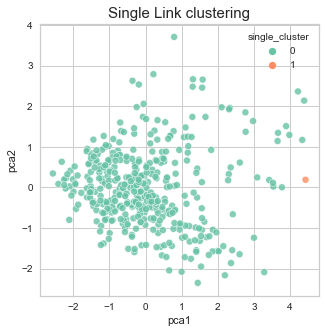

In [36]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='single_cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("Single Link clustering", fontsize= 15)
plt.show()

## Complete Link

In [37]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
labels = cluster.fit_predict(X)

In [38]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['complete_cluster'] = labels
pca_proj.head()

,pca1,pca2,pca3,complete_cluster
0,-0.676379,1.392263,-0.749697,1
1,-2.567063,0.342930,-0.684335,1
2,-0.525759,-0.929982,0.214567,3
3,0.347593,-1.125077,-0.166905,0
4,1.430663,0.464635,0.355078,1


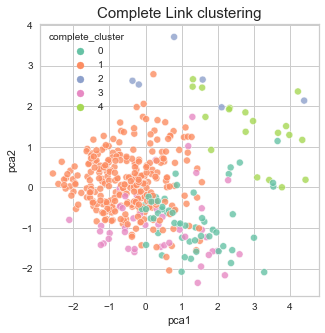

In [39]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='complete_cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("Complete Link clustering", fontsize= 15)
plt.show()

### Average Link

In [40]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
labels = cluster.fit_predict(X)

In [41]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['avg_cluster'] = labels
pca_proj.head()

,pca1,pca2,pca3,avg_cluster
0,-0.676379,1.392263,-0.749697,0
1,-2.567063,0.342930,-0.684335,0
2,-0.525759,-0.929982,0.214567,0
3,0.347593,-1.125077,-0.166905,0
4,1.430663,0.464635,0.355078,0


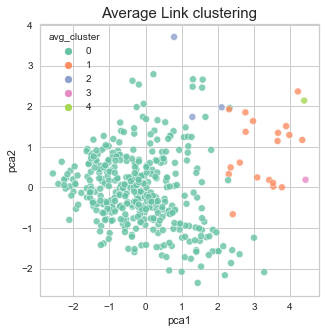

In [42]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='avg_cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("Average Link clustering", fontsize= 15)
plt.show()